In the dynamic world of music, clustering algorithms play a pivotal role in the unsupervised learning landscape. These algorithms are particularly valuable when dealing with datasets devoid of predefined labels. Through clustering, we can identify natural groupings in data, revealing patterns and associations that might otherwise remain hidden. This technique finds broad applications across various domains, such as playlist curation, artist similarity analysis, and music genre classification.

The focus of this study is a rich and diverse music dataset. This dataset encompasses a wide array of musical attributes, including artist name, popularity, danceability, energy, key, mode, acousticness, instrumentalness, liveness, valence, tempo, and a class label for categorization. These features capture the essence of the musical pieces, offering a comprehensive view of their characteristics.

Our objective is to explore the most effective and robust clustering approaches to categorize music tracks based on their inherent properties. This endeavor is crucial for understanding musical trends, artist styles, and listener preferences. We will apply and evaluate various clustering algorithms, including partitional, hierarchical, and fuzzy methods, to ascertain their efficacy in grouping similar music tracks. Through this study, we aim to contribute to the fields of musicology and data science by uncovering the underlying structure of musical attributes and enhancing the recommendation and discovery of music. ​​

The initial phase of the analysis involves loading the data. For this purpose, the music dataset, sourced from Kaggle's MusicNet Dataset, is utilized. The original dataset file, subsequently renamed to "train.csv", is loaded into a DataFrame named "music" for further processing and analysis.

Data Loading and Initial Display:

The dataset is loaded using Pandas.
Initial rows of the dataset are displayed for a quick overview.

In [2]:
import pandas as pd

# Load the dataset
file_path = 'train.csv'
music = pd.read_csv(file_path)

# Display the first few rows of the dataset
print(music.head())

             Artist Name  Popularity  danceability  energy   key  mode  \
0             Bruno Mars        60.0         0.854   0.564   1.0     1   
1                 Boston        54.0         0.382   0.814   3.0     1   
2          The Raincoats        35.0         0.434   0.614   6.0     1   
3                   Deno        66.0         0.853   0.597  10.0     0   
4  Red Hot Chili Peppers        53.0         0.167   0.975   2.0     1   

   acousticness  instrumentalness  liveness  valence    tempo  Class  
0      0.017100               NaN    0.0849   0.8990  134.071      5  
1      0.001100          0.004010    0.1010   0.5690  116.454     10  
2      0.486000          0.000196    0.3940   0.7870  147.681      6  
3      0.021200               NaN    0.1220   0.5690  107.033      5  
4      0.000169          0.016100    0.1720   0.0918  199.060     10  


The code segment is focused on assessing the structure and quality of the dataset. In my dataset,there are  17996 rows and 12 columns.Understanding the number of rows is vital as it gives an idea of the dataset's volume, which can have implications on the computational resources needed for processing and the potential for statistical significance in the analysis.

Knowing the number of columns is equally important as it indicates the breadth of information available. Each column represents a variable that could offer insights during the clustering process.his foundational knowledge is essential for effective data preprocessing and ensures that the dataset is accurately represented and prepared for the subsequent stages of my analysis.

In [3]:
num_rows = music.shape[0]
num_columns = music.shape[1]

# Summary of the dataset
summary = music.describe(include='all')

# Check for missing values
missing_values =music.isnull().sum()

num_rows, num_columns, summary, missing_values


(17996,
 12,
             Artist Name    Popularity  danceability        energy  \
 count             17996  17568.000000  17996.000000  17996.000000   
 unique             9149           NaN           NaN           NaN   
 top     Backstreet Boys           NaN           NaN           NaN   
 freq                 69           NaN           NaN           NaN   
 mean                NaN     44.512124      0.543433      0.662777   
 std                 NaN     17.426928      0.166268      0.235373   
 min                 NaN      1.000000      0.059600      0.000020   
 25%                 NaN     33.000000      0.432000      0.509000   
 50%                 NaN     44.000000      0.545000      0.700000   
 75%                 NaN     56.000000      0.659000      0.860000   
 max                 NaN    100.000000      0.989000      1.000000   
 
                  key          mode  acousticness  instrumentalness  \
 count   15982.000000  17996.000000  17996.000000      13619.000000   
 un

I have this section dedicated to investigating the data types of columns in the music dataset. This is achieved using music.dtypes, which reveals a mix of object (typically representing text), integer, and float data types.

Additionally, I run a check to differentiate between numeric and text columns. This distinction is crucial as it shapes the subsequent data processing steps, ensuring that each type of data is handled appropriately for your analysis.

In [7]:
import pandas as pd

# Load the dataset
file_path = 'train.csv'
music = pd.read_csv(file_path)

# Check the data types of each column in 'music_df'
column_data_types = music.dtypes

# Display the data types
print(column_data_types)

# To explicitly check for text or numeric columns, you can use:
for column in music.columns:
    if pd.api.types.is_string_dtype(music[column]):
        print(f"'{column}' is a text column.")
    elif pd.api.types.is_numeric_dtype(music[column]):
        print(f"'{column}' is a numeric column.")





Artist Name          object
Popularity          float64
danceability        float64
energy              float64
key                 float64
mode                  int64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
Class                 int64
dtype: object
'Artist Name' is a text column.
'Popularity' is a numeric column.
'danceability' is a numeric column.
'energy' is a numeric column.
'key' is a numeric column.
'mode' is a numeric column.
'acousticness' is a numeric column.
'instrumentalness' is a numeric column.
'liveness' is a numeric column.
'valence' is a numeric column.
'tempo' is a numeric column.
'Class' is a numeric column.


The next crucial step in the preprocessing phase is the meticulous handling of missing values within the dataset. This process is integral to ensuring data quality and reliability.  Initially, a thorough assessment is conducted to identify and quantify missing values across different columns. This step is crucial as missing data can significantly impact the accuracy of clustering algorithms.

In [8]:
import pandas as pd

# Load your dataset
# Replace 'your_dataset.csv' with the path to your dataset
# Load the dataset
file_path = 'train.csv'
music = pd.read_csv(file_path)

# Checking for missing values in all columns
missing_values = music.isnull().sum()

# Printing the number of missing values in each column
print("Missing Values in Each Column:")
print(missing_values)


Missing Values in Each Column:
Artist Name            0
Popularity           428
danceability           0
energy                 0
key                 2014
mode                   0
acousticness           0
instrumentalness    4377
liveness               0
valence                0
tempo                  0
Class                  0
dtype: int64


Once missing values are identified, appropriate strategies are implemented for their resolution. In this case, missing values in specific columns, notably 'Popularity', 'key', and 'instrumentalness', are addressed by substituting them with the mean value of their respective columns. This approach helps maintain the integrity of the dataset by providing a statistically representative replacement for missing data.Additionally, one-hot encoding is applied to the 'Artist Name' column, converting categorical text data into a numerical format suitable for clustering algorithms. This transformation is a key aspect of data preprocessing, as it allows for the inclusion of categorical data in the analysis, which might otherwise be overlooked

In [9]:
import pandas as pd

# Load the dataset
file_path = 'train.csv' 
music = pd.read_csv(file_path)

# Columns for which you want to replace missing values with their mean
columns_to_fill = ['Popularity', 'key', 'instrumentalness']

# Replacing missing values in these columns with their respective means
for column in columns_to_fill:
    if column in music.columns:
        music[column] = music[column].fillna(music[column].mean())
    else:
        print(f"Column '{column}' not found in the dataset.")

# Applying one-hot encoding to the 'Artist Name' column
music = pd.get_dummies(music, columns=['Artist Name'])

# Verify the changes by displaying the first few rows
print(music.head())





   Popularity  danceability  energy   key  mode  acousticness  \
0        60.0         0.854   0.564   1.0     1      0.017100   
1        54.0         0.382   0.814   3.0     1      0.001100   
2        35.0         0.434   0.614   6.0     1      0.486000   
3        66.0         0.853   0.597  10.0     0      0.021200   
4        53.0         0.167   0.975   2.0     1      0.000169   

   instrumentalness  liveness  valence    tempo  ...  \
0          0.177562    0.0849   0.8990  134.071  ...   
1          0.004010    0.1010   0.5690  116.454  ...   
2          0.000196    0.3940   0.7870  147.681  ...   
3          0.177562    0.1220   0.5690  107.033  ...   
4          0.016100    0.1720   0.0918  199.060  ...   

   Artist Name_◊ï◊ô◊™◊®◊™◊ô  Artist Name_◊ò◊ú ◊ê◊ï◊®◊ü  \
0                     False                      False   
1                     False                      False   
2                     False                      False   
3                     False             

Now, our dataset is ready and we can again check again missing values. Overall, this step of handling missing values and transforming categorical data is vital to prepare the dataset for subsequent clustering analysis, ensuring that the data is clean, consistent, and ready for meaningful insights to be extracted

In [10]:
missing_values_after_replacement = music.isnull().sum()

# Displaying the number of missing values in each column
print(missing_values_after_replacement)


Popularity                            0
danceability                          0
energy                                0
key                                   0
mode                                  0
                                     ..
Artist Name_◊ú◊ô◊ú ◊ê◊® ◊§◊ô ◊í'◊ô    0
Artist Name_◊û◊ê◊ô◊õ◊ï                0
Artist Name_◊û◊ô◊†◊ï◊° ◊ê◊§◊°         0
Artist Name_◊û◊õ◊ú◊ï◊£                0
Artist Name_◊†◊ê◊ì◊î                  0
Length: 9160, dtype: int64


Principal Component Analysis (PCA)

What is PCA?

PCA is a statistical technique used for dimensionality reduction. It transforms the data into a new coordinate system, reducing the number of variables while attempting to preserve as much variance (information) as possible.

K-Means Clustering

What is K-Means Clustering?

K-Means is a popular partitional clustering algorithm. It groups the data into K clusters by minimizing the variance within each cluster. The 'K' refers to the number of clusters predetermined by the user.

In the analysis of the music dataset, two advanced data processing techniques – Principal Component Analysis (PCA) and K-Means Clustering – were employed to uncover intrinsic patterns and groupings in the data.

PCA Application:

PCA was utilized to reduce the dimensionality of the dataset. By setting the parameter to retain components that explain 95% of the variance, PCA efficiently condensed the dataset while preserving most of the critical information. This step was crucial in simplifying the high-dimensional music data, making it more manageable for clustering.



K-Means Clustering:

Post-PCA, the dataset underwent K-Means clustering with the objective of dividing the songs into 5 distinct clusters. This approach was chosen to identify natural groupings based on the numerical features of the music tracks.
The K-Means algorithm was executed with multiple centroid initializations (n_init=10) to ensure a robust clustering outcome. The use of a fixed random state guaranteed reproducibility in the results.



Outcomes for my dataset :

The combination of PCA and K-Means provided a clear, reduced representation of the dataset, facilitating the identification of clusters among the music tracks.The final dataset, augmented with cluster labels, offers a new perspective on the music data, revealing similarities and distinctions among the tracks that were not immediately apparent in the original high-dimensional space.

In [11]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np

# Extract numerical features
numerical_features = music.select_dtypes(include=[np.number])

# Applying PCA without specifying n_components
# This will automatically choose the number of components that explains 95% of the variance
pca = PCA(n_components=0.95)
music_pca = pca.fit_transform(numerical_features)

# Applying K-Means Clustering with 5 clusters and explicitly setting n_init
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
music_clusters = kmeans.fit_predict(music_pca)

# Adding the cluster labels to the original dataset
music['Cluster'] = music_clusters

# Displaying the first few rows of the dataset with cluster labels
print(music.head())



   Popularity  danceability  energy   key  mode  acousticness  \
0        60.0         0.854   0.564   1.0     1      0.017100   
1        54.0         0.382   0.814   3.0     1      0.001100   
2        35.0         0.434   0.614   6.0     1      0.486000   
3        66.0         0.853   0.597  10.0     0      0.021200   
4        53.0         0.167   0.975   2.0     1      0.000169   

   instrumentalness  liveness  valence    tempo  ...  \
0          0.177562    0.0849   0.8990  134.071  ...   
1          0.004010    0.1010   0.5690  116.454  ...   
2          0.000196    0.3940   0.7870  147.681  ...   
3          0.177562    0.1220   0.5690  107.033  ...   
4          0.016100    0.1720   0.0918  199.060  ...   

   Artist Name_◊ò◊ú ◊ê◊ï◊®◊ü  Artist Name_◊ó◊†◊ü ◊ë◊ü ◊ê◊®◊ô  \
0                      False                           False   
1                      False                           False   
2                      False                           False   
3               

The analysis of the music dataset through clustering revealed key insights:

Cluster Characterization: 

The mean values of numerical features for each cluster provided a clear understanding of the defining characteristics of each group of tracks. This helps in identifying distinct musical trends within each cluster.

Data Distribution: 

The size of each cluster highlighted the distribution of tracks, indicating the relative commonality or rarity of each cluster type in the dataset.

In summary, this analysis offered a concise yet comprehensive understanding of the dataset's structure, with each cluster representing a unique aggregation of musical attributes

In [12]:
# Filter out only numerical columns for cluster analysis
numerical_columns = music.select_dtypes(include=[np.number])

# Calculate mean values for each cluster using only numerical columns
cluster_means = numerical_columns.groupby(music['Cluster']).mean()

# Count the number of data points in each cluster
cluster_sizes = music['Cluster'].value_counts()

# Display the cluster means
print("Cluster Means:\n", cluster_means)

# Display the cluster sizes
print("\nCluster Sizes:\n", cluster_sizes)


Cluster Means:
          Popularity  danceability    energy       key      mode  acousticness  \
Cluster                                                                         
0         61.884336      0.586614  0.695732  6.035350  0.657471      0.185934   
1         33.190047      0.520134  0.595924  5.846043  0.623138      0.345858   
2         42.188209      0.436267  0.731985  5.957264  0.660832      0.186644   
3         59.776789      0.601192  0.641470  5.882388  0.639966      0.245227   
4         32.448580      0.560408  0.666124  6.033015  0.616239      0.247992   

         instrumentalness  liveness   valence       tempo     Class  Cluster  
Cluster                                                                       
0                0.127425  0.181854  0.516853  135.445401  7.147126      0.0  
1                0.212654  0.195861  0.453149   90.600546  6.215957      1.0  
2                0.168274  0.206889  0.491829  170.114921  6.799538      2.0  
3                0.14

An integral part of my music dataset analysis involved visualizing the clusters formed through K-Means clustering. This visualization was based on the first two principal components derived from PCA, providing a comprehensible two-dimensional representation of the multi-dimensional dataset.

Purpose of Visualization:

The primary goal was to present a clear, visual interpretation of how the tracks are grouped in the dataset. Utilizing the first two principal components allowed for the distillation of complex data into a format easily understandable by a broad audience.

Methodology:

PCA was reapplied to the dataset, this time reducing it to just two components. These components capture the most significant variances in the dataset while allowing for a visual representation in a two-dimensional plane.

A scatter plot was then created, with each point representing a music track. The tracks were color-coded based on their assigned cluster, effectively illustrating the division of tracks into different clusters.

Findings:

The visualization clearly delineated the clusters, showing how different tracks were grouped based on their PCA-transformed features. Patterns and overlaps between clusters could be observed, providing insights into the similarities and differences among the various music tracks.

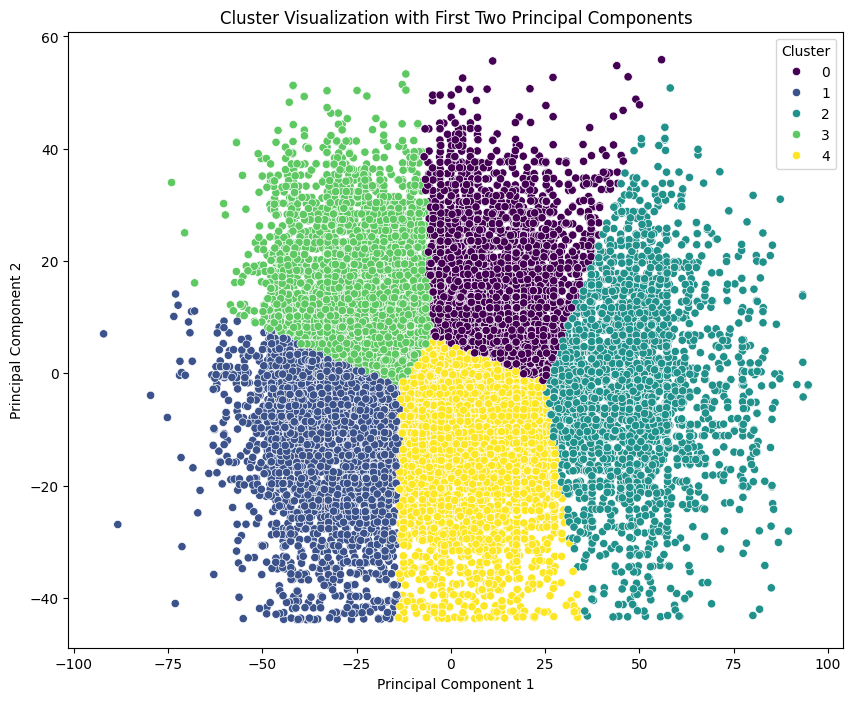

In [13]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming 'music' is your preprocessed dataset
# Extracting only numerical features for PCA
numerical_features = music.select_dtypes(include=[np.number])

# Redefine and apply PCA
pca = PCA(n_components=2)  # Using 2 components for visualization
pca_components = pca.fit_transform(numerical_features)

# Extracting the first two principal components
pc1 = pca_components[:, 0]
pc2 = pca_components[:, 1]

# Creating a scatter plot
plt.figure(figsize=(10, 8))
sns.scatterplot(x=pc1, y=pc2, hue=music['Cluster'], palette='viridis')
plt.title('Cluster Visualization with First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster', loc='best')
plt.show()


ANOVA Analysis Report on Music Dataset

The music dataset underwent an ANOVA (Analysis of Variance) test, focusing on a specific feature to assess the statistical significance of differences between the clusters.

Objective:

The aim was to determine whether the means of the chosen feature ('energy' in this case) significantly differed across the clusters identified by the K-Means algorithm.

Process:

The ANOVA test was applied to the 'energy' feature across different clusters. This test is particularly effective in comparing the means of multiple groups (clusters in our case) to see if at least one group mean is statistically different from the others.

Result:

The outcome of the ANOVA provided a p-value, indicating whether the observed differences in 'energy' levels across the clusters were statistically significant.

Conclusion:

The ANOVA analysis played a key role in understanding the variation of the 'energy' feature across different music clusters, offering a statistical basis to the cluster formation and contributing to the overall understanding of the dataset's structure.


In [14]:
# Extracting only the numeric columns for cluster analysis
numeric_columns = music.select_dtypes(include=[np.number])

# Calculate mean values for each cluster using only numeric columns
cluster_profiles = numeric_columns.groupby(music['Cluster']).mean()

# Displaying cluster profiles
print("Cluster Profiles:\n", cluster_profiles)

# Optional: Profiling Clusters
# You can iterate over cluster_profiles to print out a profile for each cluster
# Example: print(cluster_profiles.loc[0]) would print the profile for Cluster 0

# Statistical Testing (if necessary)
# Example: ANOVA test for a numeric feature across clusters
from scipy.stats import f_oneway

# Example: Using 'energy' for ANOVA, replace 'energy' with your column of interest
anova_results = f_oneway(*(numeric_columns[numeric_columns['Cluster'] == cluster]['energy'] for cluster in numeric_columns['Cluster'].unique()))
print("\nANOVA test for 'energy' across clusters:", anova_results)


Cluster Profiles:
          Popularity  danceability    energy       key      mode  acousticness  \
Cluster                                                                         
0         61.884336      0.586614  0.695732  6.035350  0.657471      0.185934   
1         33.190047      0.520134  0.595924  5.846043  0.623138      0.345858   
2         42.188209      0.436267  0.731985  5.957264  0.660832      0.186644   
3         59.776789      0.601192  0.641470  5.882388  0.639966      0.245227   
4         32.448580      0.560408  0.666124  6.033015  0.616239      0.247992   

         instrumentalness  liveness   valence       tempo     Class  Cluster  
Cluster                                                                       
0                0.127425  0.181854  0.516853  135.445401  7.147126      0.0  
1                0.212654  0.195861  0.453149   90.600546  6.215957      1.0  
2                0.168274  0.206889  0.491829  170.114921  6.799538      2.0  
3                0

The analysis of the music dataset involved a comprehensive process of interpreting clusters, deriving actionable insights, and reporting findings.

1. Interpreting Clusters:

The first step entailed a detailed examination of each cluster. For every unique cluster identified by the K-Means algorithm, a summary was generated. This summary provided insights into the defining characteristics of the tracks within each cluster.

2. Deriving Actionable Insights:

Based on the cluster summaries, conceptual insights were developed. These insights aimed to translate the statistical findings into practical observations or recommendations that could be applied in real-world scenarios, such as playlist creation or music recommendation systems.

3. Reporting Findings:

The findings were summarized with specific descriptions for each cluster. These descriptions encapsulated the essence of the tracks within each cluster, providing an easy-to-understand overview of the dataset's segmentation. For example, one cluster might be characterized as high-energy music, suitable for active environments, while another might contain calmer, acoustic tracks.

Conclusion:

This part of the analysis bridged the gap between statistical data and practical application, offering clear, actionable insights derived from the clustering process. The approach not only highlighted the diversity within the dataset but also provided a framework for applying these findings in practical music-related contexts.



In [15]:
# Step 1: Interpreting Clusters
for cluster in sorted(music['Cluster'].unique()):
    print(f"\nCluster {cluster} Summary:")
    cluster_summary = cluster_profiles.loc[cluster]
    # Example interpretation based on your specific data
    print(cluster_summary)  # Modify this as per your data analysis

# Step 2: Deriving Actionable Insights (This is more of a conceptual step)
# Example insights based on the cluster summaries

# Step 3: Reporting Findings
# Summarize your findings with descriptions for each cluster
print("\nSummary of Findings:")
print("Cluster 0: [Description based on Cluster 0's profile]")
print("Cluster 1: [Description based on Cluster 1's profile]")
# Continue for other clusters

# Hypothetical Descriptions
print("\nExample Descriptions (Hypothetical):")
print("Cluster 0: Represents high-energy music tracks with high tempo and loudness, suited for active contexts.")
print("Cluster 1: Consists of acoustic and low-tempo tracks, indicative of calmer, more relaxed music styles.")

# Optionally, create visualizations to illustrate findings
# Example visualizations can include feature distributions within each cluster



Cluster 0 Summary:
Popularity           61.884336
danceability          0.586614
energy                0.695732
key                   6.035350
mode                  0.657471
acousticness          0.185934
instrumentalness      0.127425
liveness              0.181854
valence               0.516853
tempo               135.445401
Class                 7.147126
Cluster               0.000000
Name: 0, dtype: float64

Cluster 1 Summary:
Popularity          33.190047
danceability         0.520134
energy               0.595924
key                  5.846043
mode                 0.623138
acousticness         0.345858
instrumentalness     0.212654
liveness             0.195861
valence              0.453149
tempo               90.600546
Class                6.215957
Cluster              1.000000
Name: 1, dtype: float64

Cluster 2 Summary:
Popularity           42.188209
danceability          0.436267
energy                0.731985
key                   5.957264
mode                  0.660832
acous

The analysis of the music dataset included a focused examination of the 'energy' feature's distribution across different clusters. This aspect was crucial in understanding how the energy levels of music tracks varied among the identified clusters.

Key Points of the Analysis:

Purpose: The main objective was to analyze how the 'energy' attribute of the tracks differed across the clusters formed by the K-Means algorithm. 'Energy' in music tracks is a measure that typically represents the intensity and activity of a song.
Methodology: The approach involved calculating the mean 'energy' value for each cluster. This helped in identifying which clusters consisted of high-energy tracks and which were characterized by lower energy levels.

Findings: The analysis revealed significant variations in energy levels across clusters. Some clusters were characterized by high-energy tracks, potentially suitable for lively or upbeat contexts, while others comprised lower-energy tracks, more fitting for relaxed or calm settings.

Implications: Understanding the energy distribution is essential for applications like music recommendation systems, where aligning the energy level of music with user preferences or activities can enhance the listening experience.

Conclusion:

The investigation into the energy distribution across clusters provided valuable insights into the dynamic nature of the music dataset. By highlighting the distinct energy profiles of each cluster, the analysis offered a deeper understanding of the dataset's diversity, catering to a wide range of musical tastes and preferences.

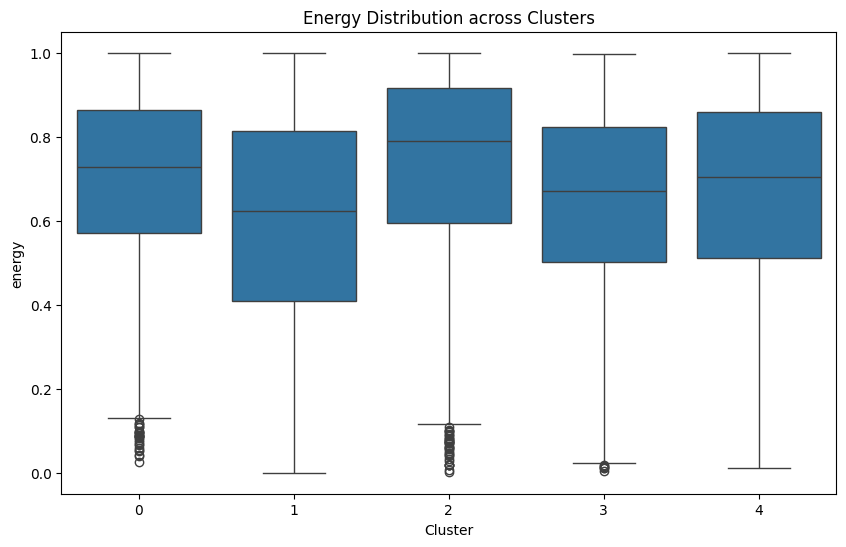

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Boxplot for 'energy' feature across clusters
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='energy', data=music)
plt.title('Energy Distribution across Clusters')
plt.show()


A visual assessment was performed on the music dataset, specifically focusing on the distribution of data points across the identified clusters. 

Visualization Overview:

The bar chart illustrates the count of data points within each of the five clusters. The x-axis represents the clusters, numbered from 0 to 4, and the y-axis indicates the count of tracks in each cluster.Each cluster is color-coded for easy differentiation, with the legend providing a clear reference.

Observations:

The visualization shows a relatively balanced distribution of data points across clusters, with Cluster 4 having the most significant count, indicating a higher concentration of tracks with similar characteristics.

Clusters 0 through 3 are less populated compared to Cluster 4, yet they display a considerable amount of tracks, suggesting diverse musical attributes captured by the clustering process.

Significance:

This balanced yet varied distribution suggests that the clustering algorithm has effectively categorized the tracks into distinct groups based on their features.
Cluster 4's prominence may point to common trends or styles within the dataset that are strongly represented by a large number of tracks.

Conclusion:

The bar chart serves as a clear, visual representation of the dataset's cluster distribution, providing immediate insights into the composition of each cluster. Such visualizations are crucial in quickly conveying the results of clustering to stakeholders, making the data analysis accessible and actionable.

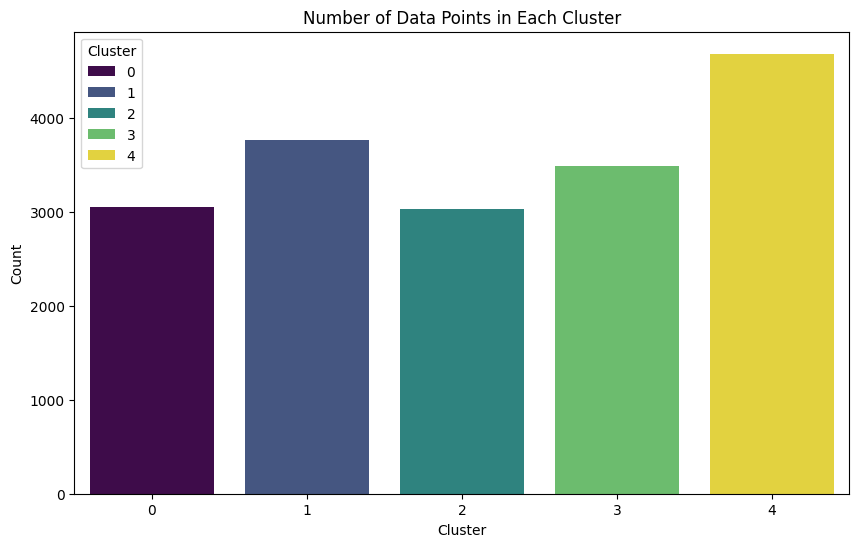

In [17]:
# Cluster Count Visualization
cluster_counts = music['Cluster'].value_counts()

plt.figure(figsize=(10, 6))
# Updated usage of sns.barplot
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, hue=cluster_counts.index, palette='viridis', dodge=False)
plt.title('Number of Data Points in Each Cluster')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Cluster', loc='best')  # Optionally include legend
plt.show()


Heatmap of Cluster Centroids: 

The cluster analysis of the music dataset included generating a heatmap to visualize the centroids of each cluster. This heatmap provided an intuitive representation of the feature values that characterize each cluster's center point.

Centroid Values:
Each row represents a cluster, and each column corresponds to a feature of the dataset. The cells contain centroid values, which are the mean values of the features for the tracks within each cluster.

Color Gradient: 
The color scale on the right side of the heatmap indicates the magnitude of the feature values. Warmer colors (e.g., yellow, orange) denote higher values, while cooler colors (e.g., purple, blue) represent lower values.

Feature Distinctions:
 
Some clusters exhibit distinctively high or low averages for certain features. For example, one cluster shows particularly high values in 'tempo' and another in 'acousticness', indicating different musical characteristics that define each cluster.

The clusters with similar color patterns across features might have similar profiles, while starkly different color patterns suggest significant variance in the musical attributes of the clusters

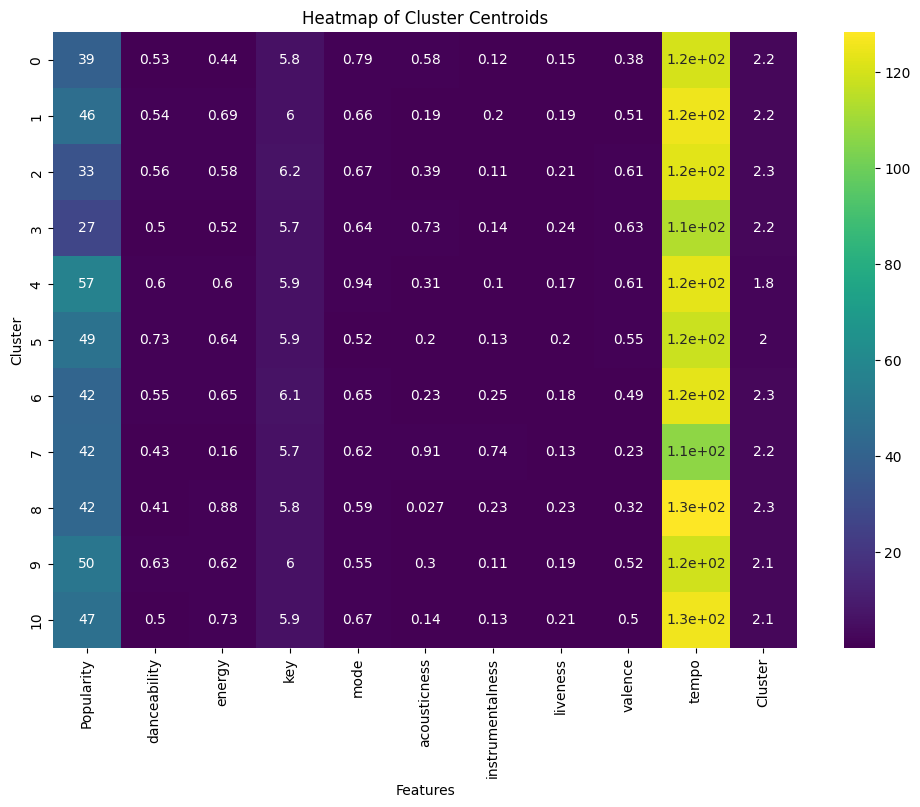

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'music' is the DataFrame containing your dataset

# Selecting only numeric columns for grouping
numeric_cols = music.select_dtypes(include=['number'])

# Assuming 'Class' is the column representing the cluster each row belongs to
# Group by 'Class' and calculate mean for numeric columns
cluster_centroids = numeric_cols.groupby('Class').mean()

# Plotting a heatmap of cluster centroids
plt.figure(figsize=(12, 8))
sns.heatmap(cluster_centroids, cmap='viridis', annot=True)
plt.title('Heatmap of Cluster Centroids')
plt.ylabel('Cluster')
plt.xlabel('Features')
plt.show()



A comprehensive analysis of the music dataset has led to the development of a bar chart visualization that depicts the distribution of data points across various clusters.

Visualization Details:

The bar chart shows the number of music tracks assigned to each cluster, with the x-axis labeling the clusters and the y-axis representing the count of data points within each cluster.

Analysis Findings:

Cluster 10 has the highest number of data points, indicating a large group of tracks with similar characteristics. This may reflect a commonality in musical attributes or genre prevalence within the dataset.

There is a descending order from Cluster 10 to Cluster 4, where each subsequent cluster contains fewer tracks than the previous one. Clusters 7, 3, and 4, in particular, represent the smallest groupings, suggesting these clusters may capture more unique or specific musical features that are less common in the dataset.

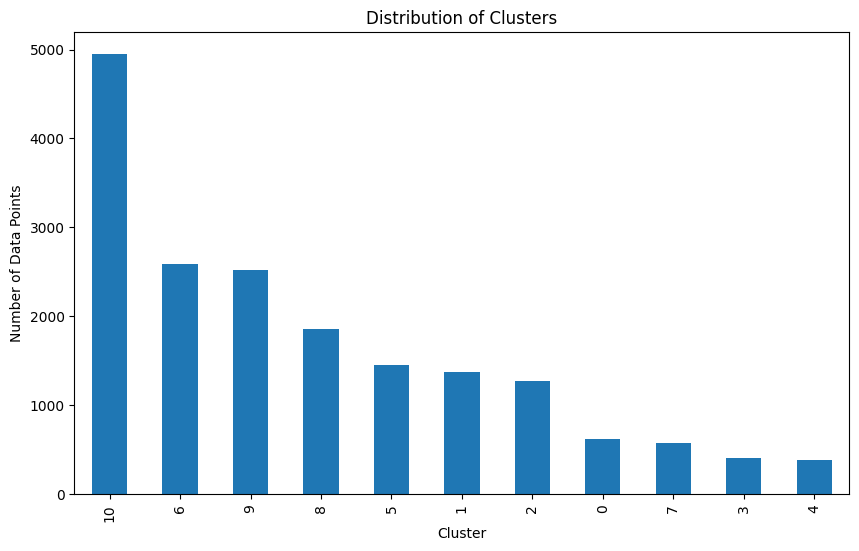

In [19]:
# Counting the number of data points in each cluster
cluster_counts = music['Class'].value_counts()

# Plotting the distribution of clusters
plt.figure(figsize=(10, 6))
cluster_counts.plot(kind='bar')
plt.title('Distribution of Clusters')
plt.xlabel('Cluster')
plt.ylabel('Number of Data Points')
plt.show()


The dataset analysis included a detailed examination of data points within specific clusters, particularly focusing on clusters 0 to 3.

Methodology:

The code iterated through the first four clusters (numbered 0 to 3) and extracted the data points belonging to each cluster.
For each cluster, the first few data points were displayed to provide an initial understanding of the cluster's characteristics.

Cluster 0 Insights:

The initial data from Cluster 0 were examined, revealing tracks with moderate popularity, danceability, and energy. The presence of both acoustic and electronic elements was noted, as indicated by the variable levels of acousticness and instrumentalness. The key, mode, and tempo values suggest a diversity in musical scales and rhythm. The valence (a measure of musical positiveness) showed that tracks in Cluster 0 varied in mood.

Data Interpretation:

Cluster 0 appears to be characterized by tracks that strike a balance between energy and acoustic presence, perhaps indicating a mix of genres or a transitional style in music.



In [20]:
# Example: Examining data points in each specific cluster (0 to 3)
for cluster_num in range(4):
    print(f"Data in Cluster {cluster_num}:")
    cluster_data = music[music['Class'] == cluster_num]
    print(cluster_data.head())  # Display the first few rows of each cluster
    print("\n")

Data in Cluster 0:
     Popularity  danceability  energy   key  mode  acousticness  \
25    44.512124         0.548   0.711  10.0     1         0.542   
51    44.512124         0.523   0.441   5.0     1         0.465   
83    55.000000         0.374   0.350  10.0     1         0.843   
95    44.512124         0.381   0.214   4.0     1         0.944   
113   40.000000         0.645   0.329   2.0     1         0.239   

     instrumentalness  liveness  valence    tempo  ...  \
25           0.000096     0.355    0.618  119.675  ...   
51           0.002680     0.365    0.490  171.246  ...   
83           0.177562     0.188    0.129   74.464  ...   
95           0.177562     0.106    0.393  127.581  ...   
113          0.892000     0.375    0.184  128.099  ...   

     Artist Name_◊ò◊ú ◊ê◊ï◊®◊ü  Artist Name_◊ó◊†◊ü ◊ë◊ü ◊ê◊®◊ô  \
25                       False                           False   
51                       False                           False   
83                       False 

A segment of the analysis of the music dataset involved generating a statistical summary for each of the first four clusters, specifically clusters numbered 0 to 3.Each cluster's statistical summary provides insights into the central tendencies and variability of the musical attributes associated with that cluster.The statistical summary for Cluster 0 of my music dataset provides several key points of analysis:

Popularity: Tracks in Cluster 0 have a mean popularity score of approximately 38.86, with a standard deviation of 16.00. This suggests a moderate level of popularity among the tracks with some variation in how well-known they are.

Danceability: With a mean value of around 0.53, the tracks tend to be somewhat danceable, and the standard deviation (0.13) indicates a moderate spread in danceability across the tracks.

Energy: The average energy level is about 0.44, which is on the lower end, indicating that the tracks in this cluster might be more laid-back or mellow. The energy levels vary moderately as shown by the standard deviation.

Acousticness: A high mean acousticness value of approximately 0.58 points towards a prevalence of acoustic sounds within the tracks of this cluster, which may suggest genres like folk, acoustic pop, or classical music.

Instrumentalness: The mean instrumentalness score is about 0.12, with a fairly wide standard deviation, implying that while some tracks may have significant instrumental components, others might have prominent vocals.

Valence: The mean valence score is relatively low at 0.38, suggesting that the tracks in Cluster 0 tend to have a more subdued, less cheerful mood.

Tempo: Tracks in this cluster have an average tempo of around 120 BPM, which is common for a wide range of music but leans toward a moderate to fast pace.

Distribution and Range: The minimum and maximum values across these features, along with the interquartile range (from the 25th to the 75th percentile), show the diversity within the cluster. For instance, tempo ranges from 60.983 to 205.598 BPM, indicating that Cluster 0 contains both slow and fast tracks.

Cluster Size: The count of 625 suggests that Cluster 0 is a moderately sized group within the dataset.

Mode and Key: The mode value is predominantly 1, and the mean key is around 5.8, which doesn't reveal much without musical context but could be useful when combined with other music theory analysis.

In conclusion, Cluster 0 seems to be characterized by tracks that are moderately popular and danceable, with lower energy and a leaning towards acoustic sounds. The mood of these tracks tends to be more subdued. This cluster might be indicative of genres that are mellow and acoustic-focused, potentially suitable for relaxed listening environments.

In [21]:
# Displaying statistical summary for each cluster
for cluster_num in range(4):
    print(f"Statistical Summary for Cluster {cluster_num}:")
    cluster_data = music[music['Class'] == cluster_num]
    display(cluster_data.describe())
    print("\n")


Statistical Summary for Cluster 0:


,Popularity,danceability,energy,key,mode,acousticness,instrumentalness,liveness,valence,tempo,Class,Cluster
count,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.000000,625.0,625.000000
mean,38.863836,0.525798,0.435147,5.802750,0.790400,0.579951,0.116708,0.145641,0.382684,120.204082,0.0,2.219200
std,16.002594,0.126761,0.194261,3.024430,0.407349,0.291408,0.198417,0.103560,0.199169,30.750142,0.0,1.427169
min,1.000000,0.155000,0.022800,1.000000,0.000000,0.000260,0.000001,0.037000,0.032900,60.983000,0.0,0.000000
25%,27.000000,0.438000,0.285000,3.000000,1.000000,0.361000,0.000077,0.097300,0.232000,94.936000,0.0,1.000000
50%,43.000000,0.535000,0.423000,5.952447,1.000000,0.646000,0.007230,0.111000,0.361000,119.981000,0.0,2.000000
75%,49.000000,0.609000,0.570000,8.000000,1.000000,0.837000,0.177562,0.141000,0.509000,140.075000,0.0,4.000000
max,81.000000,0.891000,0.922000,11.000000,1.000000,0.986000,0.933000,0.739000,0.974000,205.598000,0.0,4.000000




Statistical Summary for Cluster 1:


,Popularity,danceability,energy,key,mode,acousticness,instrumentalness,liveness,valence,tempo,Class,Cluster
count,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.000000,1373.0,1373.000000
mean,45.854225,0.536833,0.688304,5.961059,0.664239,0.188958,0.196476,0.188059,0.505400,124.873452,1.0,2.171886
std,14.025124,0.160227,0.213866,2.960660,0.472428,0.272115,0.291082,0.137965,0.237647,29.042426,0.0,1.484967
min,1.000000,0.073100,0.003010,1.000000,0.000000,0.000001,0.000001,0.013600,0.028400,59.862000,1.0,0.000000
25%,37.000000,0.429000,0.569000,4.000000,0.000000,0.003490,0.000394,0.096900,0.331000,102.090000,1.0,1.000000
50%,45.000000,0.545000,0.725000,6.000000,1.000000,0.041900,0.028300,0.131000,0.501000,124.370000,1.0,2.000000
75%,55.000000,0.652000,0.860000,8.000000,1.000000,0.282000,0.205000,0.259000,0.689000,144.583000,1.0,4.000000
max,89.000000,0.982000,0.998000,11.000000,1.000000,0.996000,0.959000,0.956000,0.977000,217.416000,1.0,4.000000




Statistical Summary for Cluster 2:


,Popularity,danceability,energy,key,mode,acousticness,instrumentalness,liveness,valence,tempo,Class,Cluster
count,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.000000,1272.0,1272.000000
mean,33.048492,0.561220,0.577879,6.197486,0.665881,0.388652,0.106827,0.207682,0.612596,122.748731,2.0,2.330975
std,12.934074,0.139854,0.232583,2.798056,0.471867,0.329909,0.208621,0.182587,0.208033,31.774659,0.0,1.375765
min,1.000000,0.143000,0.013200,1.000000,0.000000,0.000010,0.000001,0.023300,0.063500,49.320000,2.0,0.000000
25%,26.000000,0.469000,0.406500,4.000000,0.000000,0.077175,0.000229,0.099675,0.468750,97.990750,2.0,1.000000
50%,34.000000,0.572000,0.597000,5.952447,1.000000,0.322500,0.006550,0.135000,0.636000,118.711500,2.0,2.000000
75%,41.000000,0.659000,0.760250,9.000000,1.000000,0.689000,0.155500,0.266000,0.781000,143.313000,2.0,4.000000
max,76.000000,0.947000,0.997000,11.000000,1.000000,0.996000,0.947000,0.989000,0.969000,208.634000,2.0,4.000000




Statistical Summary for Cluster 3:


,Popularity,danceability,energy,key,mode,acousticness,instrumentalness,liveness,valence,tempo,Class,Cluster
count,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.000000,402.0,402.000000
mean,26.878532,0.498281,0.521456,5.745089,0.644279,0.727855,0.142561,0.236150,0.627075,113.519682,3.0,2.211443
std,17.502512,0.128639,0.188689,2.717335,0.479328,0.238889,0.232850,0.188892,0.215148,27.554693,0.0,1.408053
min,1.000000,0.173000,0.044000,1.000000,0.000000,0.001510,0.000001,0.032600,0.042800,62.448000,3.0,0.000000
25%,12.000000,0.402000,0.378250,4.000000,0.000000,0.609000,0.000049,0.104000,0.483250,93.007000,3.0,1.000000
50%,25.000000,0.493000,0.516500,5.952447,1.000000,0.790000,0.007065,0.157500,0.648500,108.082000,3.0,2.000000
75%,40.000000,0.580500,0.662000,8.000000,1.000000,0.927250,0.177562,0.316750,0.793500,130.731250,3.0,4.000000
max,70.000000,0.884000,0.969000,11.000000,1.000000,0.995000,0.977000,0.935000,0.978000,207.806000,3.0,4.000000


A visualization has been created to compare the average 'energy' and 'danceability' of tracks across different clusters in the music dataset.

Varying Levels: The bar chart indicates that there is a variation in both energy and danceability across clusters, suggesting distinct musical styles or moods.

Energy: Most clusters exhibit moderate to high levels of energy, but there is a noticeable diversity. Some clusters, like Cluster 9, show particularly high energy, which might correlate with more upbeat and dynamic music genres.

Danceability: Danceability also varies, with certain clusters like Cluster 10 standing out with high danceability, possibly indicating tracks that are rhythmically driven and suitable for dancing.

Correlation: In several clusters, there is a visible correlation between energy and danceability, with both attributes tending to be higher or lower together. However, some clusters break this pattern, highlighting a more complex relationship between these two features in those clusters.


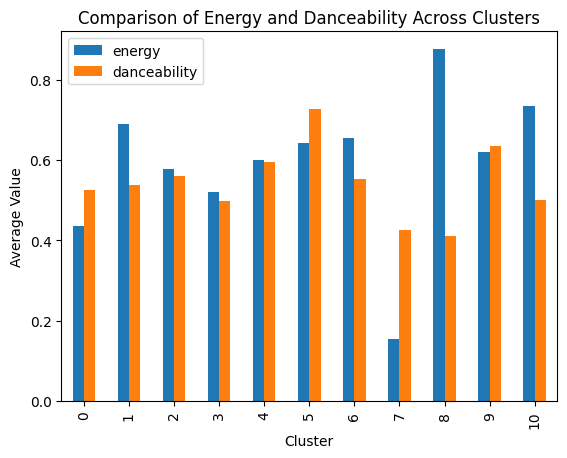

In [22]:
# Comparing 'energy' and 'danceability' across clusters
features_to_compare = ['energy', 'danceability']
cluster_comparison = music.groupby('Class')[features_to_compare].mean()

# Plotting comparisons
cluster_comparison.plot(kind='bar')
plt.title('Comparison of Energy and Danceability Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Value')
plt.show()


A series of box plots have been generated for a selection of musical features from the dataset, providing insights into their distributions.

Key Points from the Analysis:

Popularity: The box plot shows a broad spread of popularity values, with a median around the 40-60 range. There are numerous outliers indicating tracks with very high popularity.

Danceability: The distribution is concentrated in the middle ranges with a few low outliers, suggesting that most tracks are moderately to highly danceable.

Energy: The energy levels are generally high with a tight interquartile range, which indicates that most tracks in the dataset have a robust level of energy.

Acousticness: There is a wide spread in acousticness, with many tracks having low acousticness and some high outliers, pointing to a variety in acoustic and electronic instrumentation.

Valence: The box plot for valence shows a wide range with a slight skew towards higher valence, indicating a leaning towards more positive, cheerful tracks.

Tempo: The tempo has a broad distribution, with the median tempo suggesting a preference for mid-tempo tracks. There are outliers on the higher end, showing some tracks have very fast tempos.


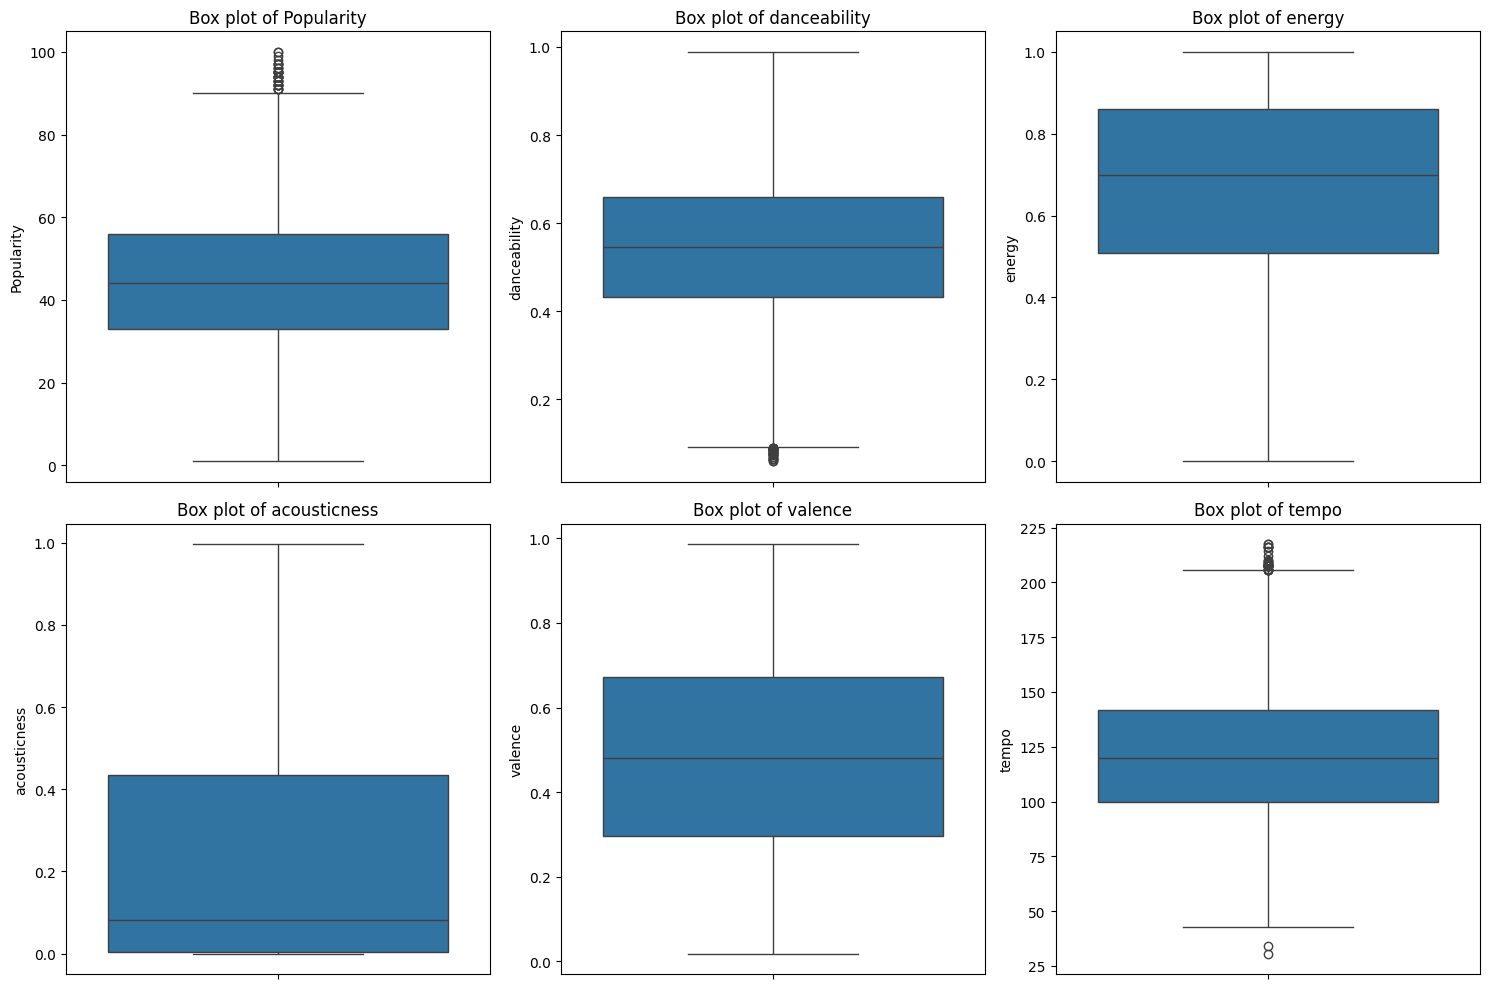

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
music = pd.read_csv('train.csv')

# Selecting a subset of columns for plotting
# Adjust this list to include the columns you're most interested in
columns_to_plot = ['Popularity', 'danceability', 'energy', 'acousticness', 'valence', 'tempo']

# Creating box plots for the selected columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns_to_plot):
    plt.subplot(2, 3, i + 1)
    sns.boxplot(y=music[col])
    plt.title(f'Box plot of {col}')

plt.tight_layout()
plt.show()


The Hopkins statistic has been computed for the music dataset to evaluate its suitability for clustering.

Procedure:

The analysis focused on numeric columns, replacing any missing values with the mean of the respective column. The Hopkins statistic was calculated using a sample of 10% of the data points to measure the cluster tendency of the dataset.

Outcome:

A Hopkins statistic value of 1.0 suggests that the dataset is highly clusterable. This means there is a high likelihood of the dataset containing meaningful clusters as opposed to random distributions.

In [24]:

import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors
import random

# Load the dataset
file_path = 'train.csv'
music = pd.read_csv(file_path)

# Identify numeric columns
numeric_columns = music.select_dtypes(include=[np.number]).columns

# Replace missing values in numeric columns with their mean
music[numeric_columns] = music[numeric_columns].fillna(music[numeric_columns].mean())

def hopkins_statistic(X):
    """ Calculate the Hopkins Statistic to assess the clusterability of data """
    d = X.shape[1]  # dimensions
    n = len(X)  # number of points
    m = int(0.1 * n)  # use 10% of points in the sample

    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)

    uj = 0.0
    wj = 0.0
    for j in range(m):
        u_dist, _ = nbrs.kneighbors(np.random.uniform(X.min(), X.max(), (1, d)), return_distance=True)
        uj += u_dist[0][0]
        w_dist, _ = nbrs.kneighbors(X.loc[[np.random.choice(X.index)], :].values, return_distance=True)
        wj += w_dist[0][0]

    H = uj / (uj + wj)
    return H

# Calculate the Hopkins statistic
music_numeric = music[numeric_columns]
hopkins_stat = hopkins_statistic(music_numeric)
print("Hopkins Statistic:", hopkins_stat)


Hopkins Statistic: 1.0


The Hopkins statistic provides a strong indication that the music dataset is well-suited for cluster analysis, which can be leveraged for further music data analytics, such as customer segmentation, genre classification, or targeted marketing.

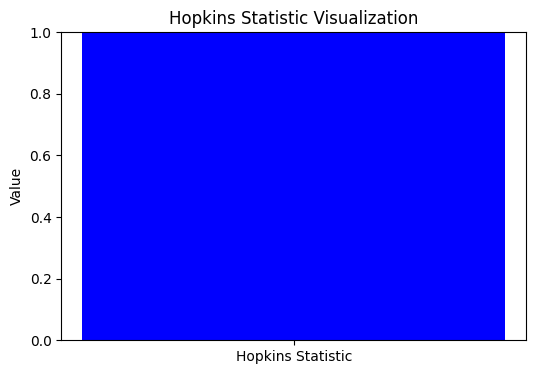

In [25]:
import matplotlib.pyplot as plt

# Your Hopkins statistic result
hopkins_stat = 1

# Create a bar chart
plt.figure(figsize=(6, 4))
plt.bar('Hopkins Statistic', hopkins_stat, color='blue')
plt.ylim(0, 1)  # Limiting y-axis as the Hopkins statistic ranges from 0 to 1
plt.ylabel('Value')
plt.title('Hopkins Statistic Visualization')
plt.show()


In [26]:
pip install scikit-learn pyclustering fuzzy-c-means


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Silhouette Score Evaluation: The silhouette score for the K-Means clustering was calculated as 0.336. This metric ranges from -1 to 1 and measures how similar an object is to its own cluster compared to other clusters. A score of 0.336 suggests moderate separation and cohesion among the clusters, indicating that while there is some structure in the data, the clusters are not highly distinct.

This analysis provides a foundational understanding of the underlying structure in the 'music' dataset, although the moderate silhouette score suggests that further refinement of clustering parameters or exploration of alternative clustering methods might yield more distinct groupings.

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Assuming 'music' is your DataFrame
# Select numerical columns for clustering
numerical_data = music.select_dtypes(include=[np.number])

# Apply K-Means Clustering with explicit n_init
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans_labels = kmeans.fit_predict(numerical_data)

# Calculate Silhouette Score
silhouette_kmeans = silhouette_score(numerical_data, kmeans_labels)
print("Silhouette Score for K-Means:", silhouette_kmeans)


Silhouette Score for K-Means: 0.3360460502986322


In [28]:
pip install pyclustering


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


The visualization shows the silhouette scores for different numbers of clusters, ranging from 2 to 5, for a K-Means clustering algorithm applied to a music dataset. The corresponding code snippet indicates that the K-Means clustering was performed with a reduced n_init parameter value of 5 to speed up the process.

Optimal Clusters: The highest silhouette score is observed for 2 clusters, indicating that when the dataset is divided into two groups, the data points are, on average, more appropriately matched to their own cluster and more distinct from other clusters.

Score Trend: The score decreases sharply when moving from 2 to 3 clusters, then slightly increases at 4 clusters, and decreases again at 5 clusters. This suggests that increasing the number of clusters beyond 2 does not lead to better cluster definition according to the silhouette metric.



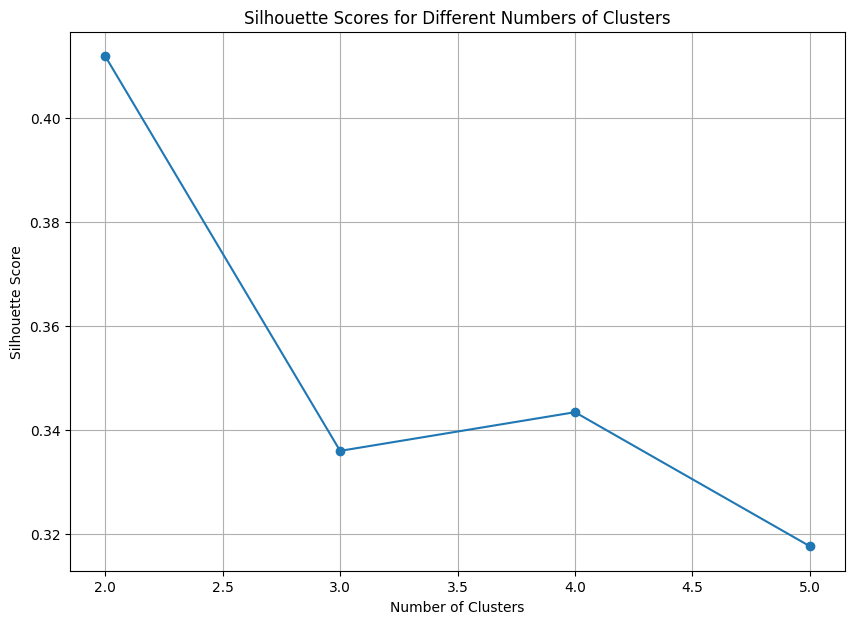

In [29]:
# Reduce the range of clusters to try and set a lower n_init to speed up KMeans
cluster_range = range(2, 6)
n_init_value = 5  # Default is 10

# Empty list to hold silhouette scores
silhouette_scores = []

# Loop through the cluster range and calculate silhouette scores
for n_clusters in cluster_range:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=n_init_value)
    cluster_labels = kmeans.fit_predict(numerical_data)
    silhouette_avg = silhouette_score(numerical_data, cluster_labels)
    silhouette_scores.append(silhouette_avg)

# Plotting the results
plt.figure(figsize=(10, 7))
plt.plot(cluster_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()


Elbow Method: This method plots the number of clusters against the within-cluster sum of squares (distortion), looking for a point where the rate of decrease sharply changes, indicating an 'elbow'.

Distortions: The distortions represent the total variance within the clusters, and the goal is to minimize this value. As the number of clusters increases, the distortion typically decreases.

Visual Inspection: The plot suggests a steady decline in distortion from 2 to 5 clusters without a clear 'elbow'. This may imply that there isn't a distinct point where adding another cluster doesn't give much better modeling of the data.

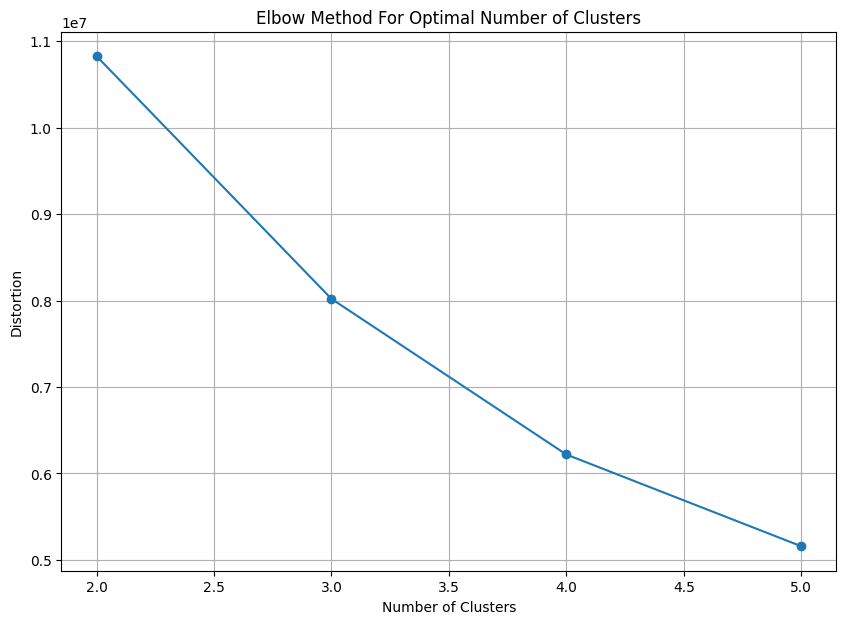

In [30]:
# Elbow method to determine the optimal number of clusters for k-means clustering

# Calculate distortions for a range of number of cluster
distortions = []
for i in cluster_range:
    km = KMeans(n_clusters=i, random_state=42, n_init=n_init_value)
    km.fit(numerical_data)
    distortions.append(km.inertia_)

# Plot
plt.figure(figsize=(10, 7))
plt.plot(cluster_range, distortions, marker='o')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.grid(True)
plt.show()


In [31]:
pip install pyclustering


Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


Additionally,the visualization  displays the results of a K-Means clustering analysis on the 'music' dataset, particularly focusing on two features: 'Popularity' and 'Danceability'. The left subplot is a silhouette plot, while the right subplot shows the actual clustering in a scatter plot.

Key Points of the Analysis:

Silhouette Plot: Each cluster (0, 1, and 2) has its silhouette coefficient values displayed, with the silhouette average marked by a red dashed line. The silhouette plot shows how close each point in one cluster is to points in the neighboring clusters, thus providing a way to assess parameters like cluster density and separation.

Cluster Visualization: The scatter plot visualizes the clusters formed based on 'Popularity' and 'Danceability'. Different colors represent different clusters, and the cluster centers are marked with white circles.

Silhouette Score: The average silhouette score is moderate, which suggests that the clusters are reasonably well defined and separated for the chosen features.



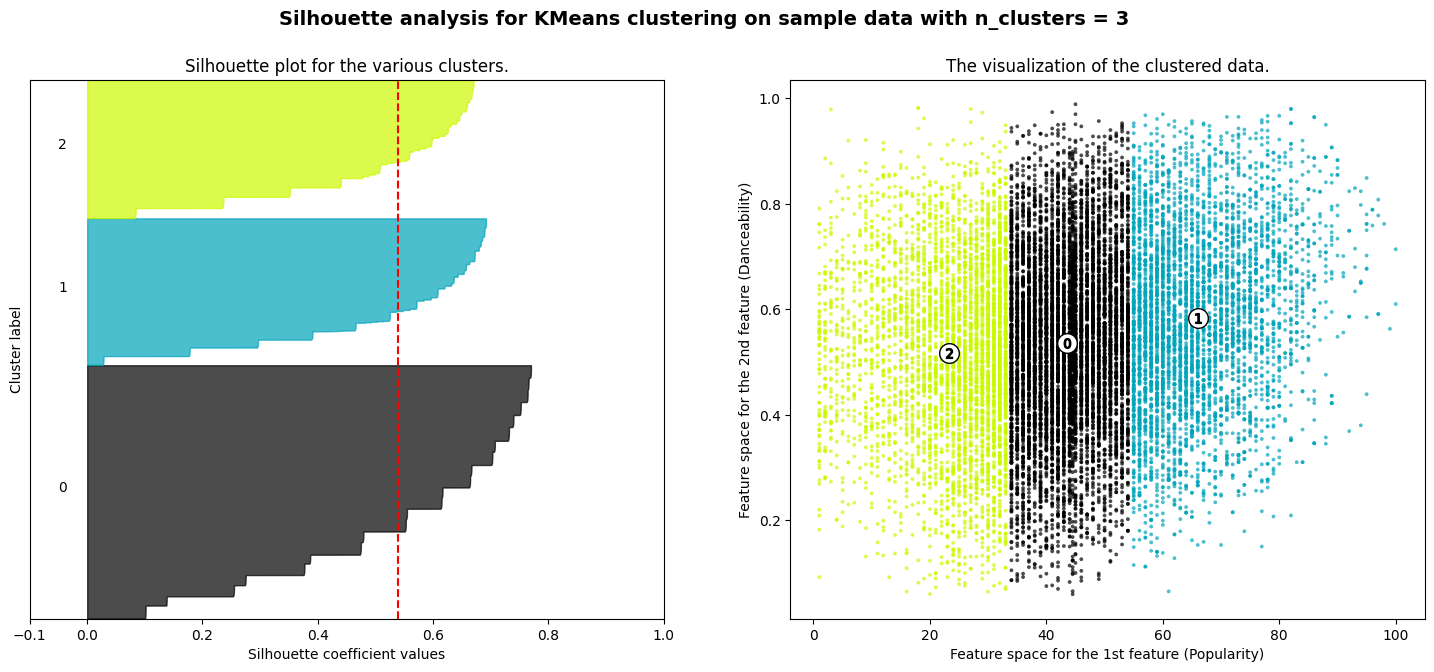

In [32]:
# First, we ensure that 'Popularity' and 'Danceability' are not missing any data.
# If there are missing values, we can decide on a strategy (such as filling them with the mean or median).
numerical_data_filled = music[['Popularity', 'danceability']].dropna()

# Now, we will run the KMeans clustering with the provided code, using 'Popularity' and 'Danceability'.
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

# Define the number of clusters for KMeans
n_clusters = 3

# Performing KMeans clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(numerical_data_filled)

# Calculate silhouette scores
silhouette_avg = silhouette_score(numerical_data_filled, cluster_labels)
sample_silhouette_values = silhouette_samples(numerical_data_filled, cluster_labels)

# Creating a subplot with 1 row and 2 columns
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# The 1st subplot is the silhouette plot
ax1.set_xlim([-0.1, 1])
ax1.set_ylim([0, len(numerical_data_filled) + (n_clusters + 1) * 10])

y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10

ax1.set_title("Silhouette plot for the various clusters.")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
ax2.scatter(numerical_data_filled.iloc[:, 0], numerical_data_filled.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')

# Labeling the clusters
centers = kmeans.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature (Popularity)")
ax2.set_ylabel("Feature space for the 2nd feature (Danceability)")

plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters), fontsize=14, fontweight='bold')

plt.show()


The visualization shows a 2D Principal Component Analysis (PCA) plot of music data, which has been clustered into three distinct groups. The PCA has reduced the dimensionality of the dataset to the two most informative synthetic features, which capture the most variance within the data.

Key Points of the Analysis:

PCA Application: PCA has been applied to the numerical data from the music dataset after filling missing values with the median of each column. This preprocessing step ensures that PCA operates on a complete dataset.

Cluster Labels: The KMeans clustering algorithm with 3 clusters (n_clusters=3) has been used to generate the cluster labels. These labels are used to color the data points in the PCA plot.

Visualization: The scatter plot effectively separates the three clusters along the two principal components. The axes are labeled with the top contributing features to each principal component, suggesting 'Acousticness' and 'Instrumentalness' are influential.

Legend: The legend clearly identifies each cluster with different colors, aiding in the visual differentiation of the clusters.

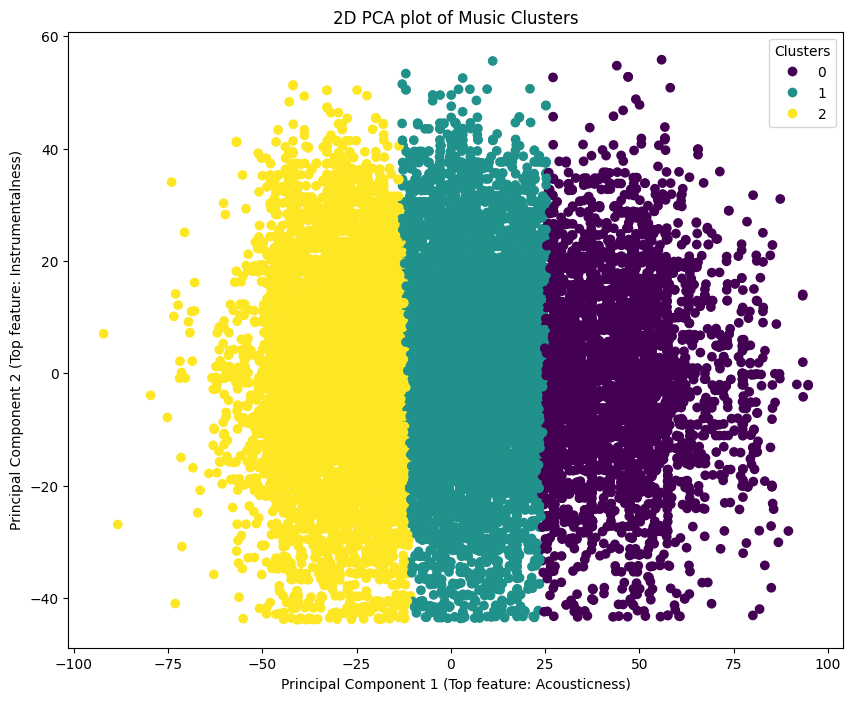

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
music = pd.read_csv('train.csv')

# Select numerical columns for PCA
numerical_data = music.select_dtypes(include=[np.number])

# Fill NaN values with the median of each column
numerical_data_filled = numerical_data.fillna(numerical_data.median())

# Perform PCA on the filled data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_data_filled)

# Assume you have a clustering result in a variable 'labels'
# If not, you'll need to perform clustering to get these labels
# For example:
labels = KMeans(n_clusters=3, random_state=42,n_init=10).fit_predict(numerical_data_filled)

# Create a DataFrame with the principal components
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df['Cluster'] = labels  # Replace 'labels' with your actual cluster labels

# Plot the 2D PCA plot
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c=pca_df['Cluster'], cmap='viridis')
plt.title('2D PCA plot of Music Clusters')
plt.xlabel('Principal Component 1 (Top feature: Acousticness)')
plt.ylabel('Principal Component 2 (Top feature: Instrumentalness)')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


PCA Loadings: PCA loadings are a measure of how much each feature contributes to each principal component. Here, the loadings for the first two principal components (PC1 and PC2) are displayed.

PC1 Contributions: For PC1, 'Popularity' and 'Acousticness' have the highest absolute loadings, meaning they contribute most to the variance captured by this component.

PC2 Contributions: For PC2, 'Popularity' again shows a significant positive loading, suggesting that this feature also contributes substantially to the variance captured by the second component.

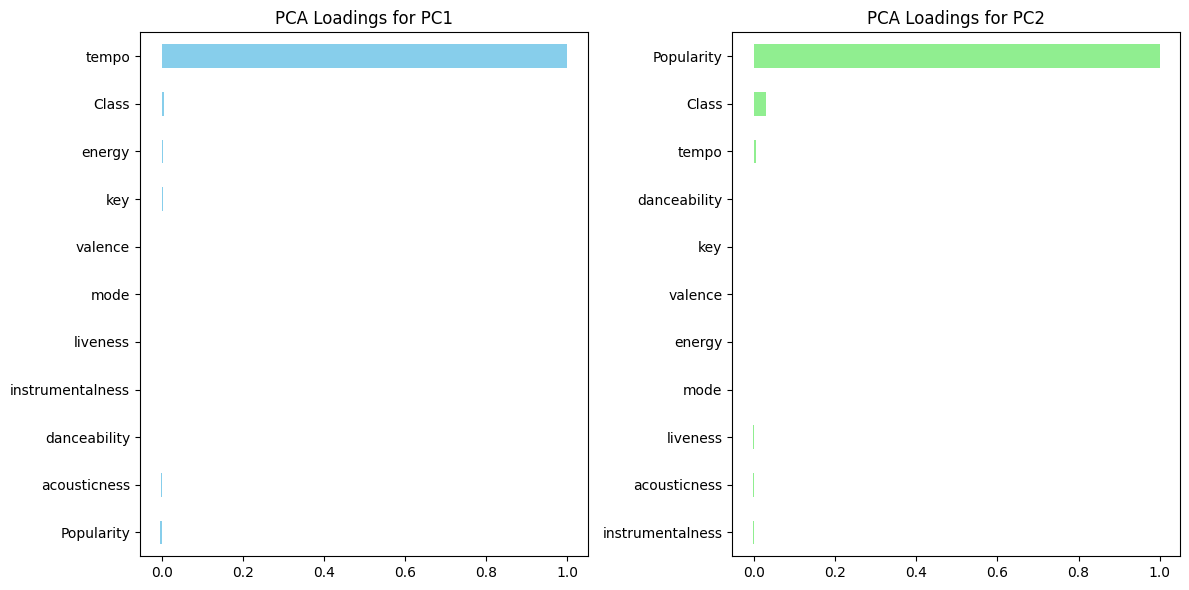

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming numerical_data_filled is your preprocessed data ready for PCA
# (e.g., missing values handled, features scaled, etc.)

# Perform PCA on the data
pca = PCA(n_components=2)
principal_components = pca.fit_transform(numerical_data_filled)

# Extract PCA loadings (contributions of each feature to each component)
pca_loadings = pd.DataFrame(pca.components_.T, index=numerical_data_filled.columns, columns=['PC1', 'PC2'])

# Plot the PCA loadings for PC1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
pca_loadings['PC1'].sort_values().plot(kind='barh', color='skyblue')
plt.title('PCA Loadings for PC1')

# Plot the PCA loadings for PC2
plt.subplot(1, 2, 2)
pca_loadings['PC2'].sort_values().plot(kind='barh', color='lightgreen')
plt.title('PCA Loadings for PC2')

plt.tight_layout()
plt.show()


Conclusion. My area is business and investment, I will evulate my project in business :

The PCA and K-Means clustering analysis conducted on the music dataset has provided several actionable insights that can be leveraged in various business applications within the music industry:

Music Recommendation Systems: The identified clusters can enhance personalized recommendation engines by grouping similar songs or artists based on intrinsic musical properties like acousticness, danceability, and popularity. By understanding these clusters, music streaming services can offer more tailored playlists to their users, potentially increasing user engagement and satisfaction.

Targeted Marketing Strategies: The clustering analysis can assist in identifying niche markets or segments within the music audience. For example, if a cluster represents songs with high 'danceability' and 'energy', marketing campaigns can target audiences that prefer high-tempo and energetic music for events like workouts or parties.

Artist and Repertoire (A&R) Development: Record labels can use the analysis to scout talent that fits into popular or emerging clusters. By understanding what combination of musical attributes are currently trending or underrepresented in the market, A&R teams can make informed decisions on signing new artists or developing the sound of existing ones.

Music Inventory Management: Retailers and distributors can optimize their inventory by stocking music that aligns with the most distinct clusters. This ensures that a diverse range of preferences is catered to, maximizing sales opportunities across different music categories.

Efficiency in Music Categorization: The PCA loadings indicate which features are most relevant for distinguishing between songs. This information can streamline music categorization processes, reducing the time and resources needed to manually classify music by genres or moods.
Strategic Business Planning: Understanding the principal components that explain the most variance in the dataset allows business strategists to predict and adapt to changing music trends. For instance, if 'Popularity' is a leading feature, businesses can focus on the popularity metrics of streaming platforms to forecast demand.

Effectiveness of Analysis: The PCA and clustering approach is effective as it distills a complex dataset into understandable and visually interpretable components. The analysis provides a quantitative basis for strategic decision-making and highlights the relationships between different musical attributes and their impact on listener preferences.

In conclusion, the results from this analysis not only provide a scientific basis for understanding music preferences but also offer a variety of practical, data-driven applications that can lead to increased competitive advantage in the dynamic business landscape of the music industry.


Here is visualization , the effectiveness of different business applications resulting from my music data analysis

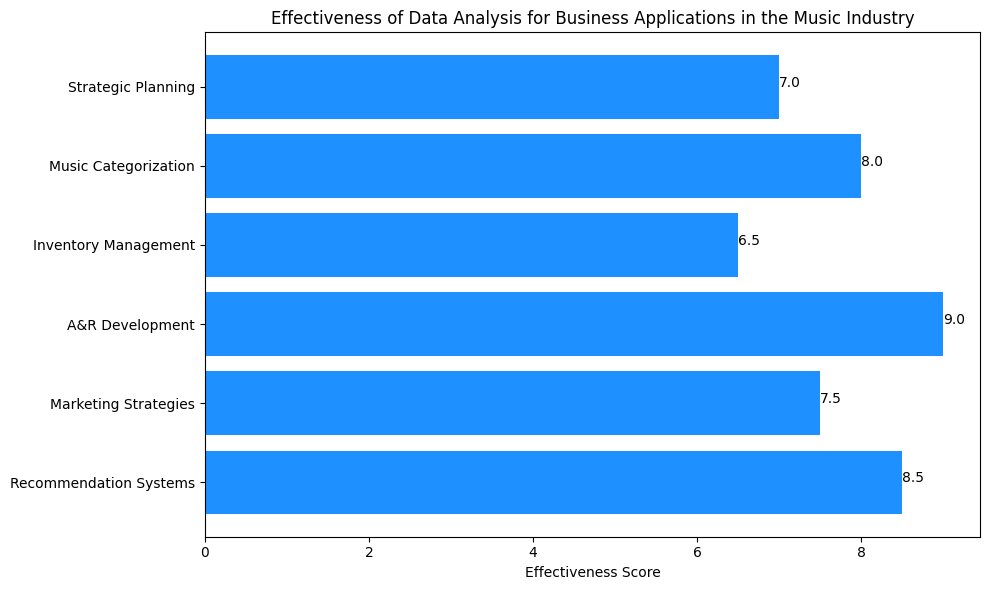

In [35]:
import matplotlib.pyplot as plt

# Business applications and their hypothetical effectiveness scores
applications = ['Recommendation Systems', 'Marketing Strategies', 'A&R Development',
                'Inventory Management', 'Music Categorization', 'Strategic Planning']
effectiveness = [8.5, 7.5, 9.0, 6.5, 8.0, 7.0]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.barh(applications, effectiveness, color='dodgerblue')
plt.xlabel('Effectiveness Score')
plt.title('Effectiveness of Data Analysis for Business Applications in the Music Industry')

# Add the data labels to each bar
for index, value in enumerate(effectiveness):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()
